In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("D:/Elevvo_ML/archive/StudentPerformanceFactors.csv")
print(df.head())
print("Missing values in each column:")
print(df.isnull().sum())
print("\nData Information:")
print(df.info())
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])
print(df.isnull().sum())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

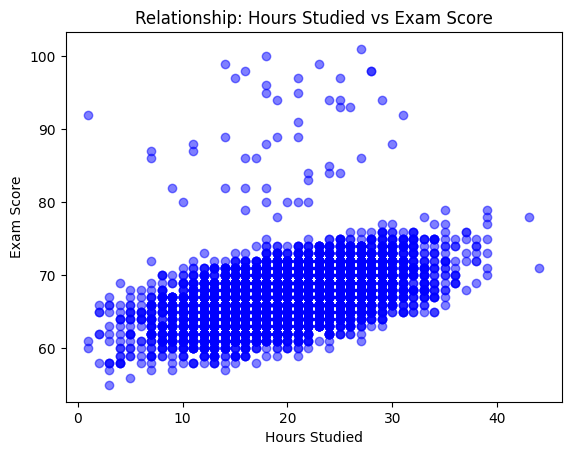

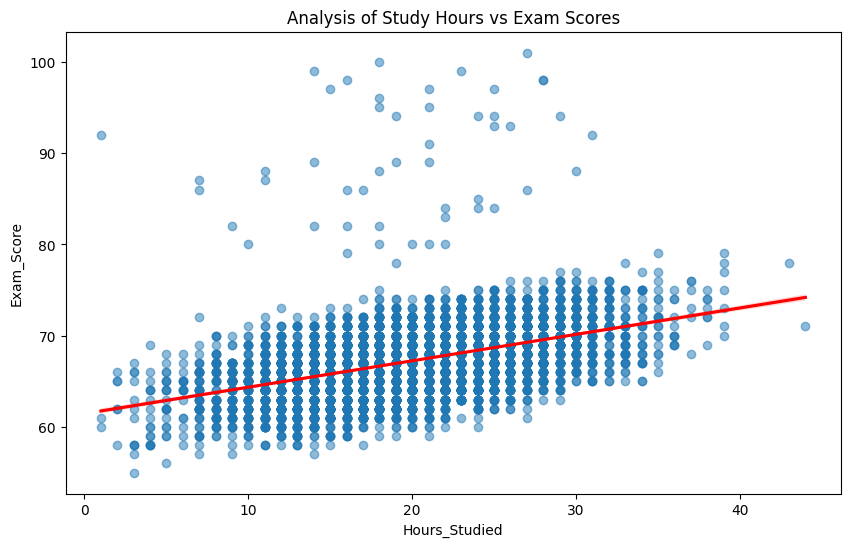

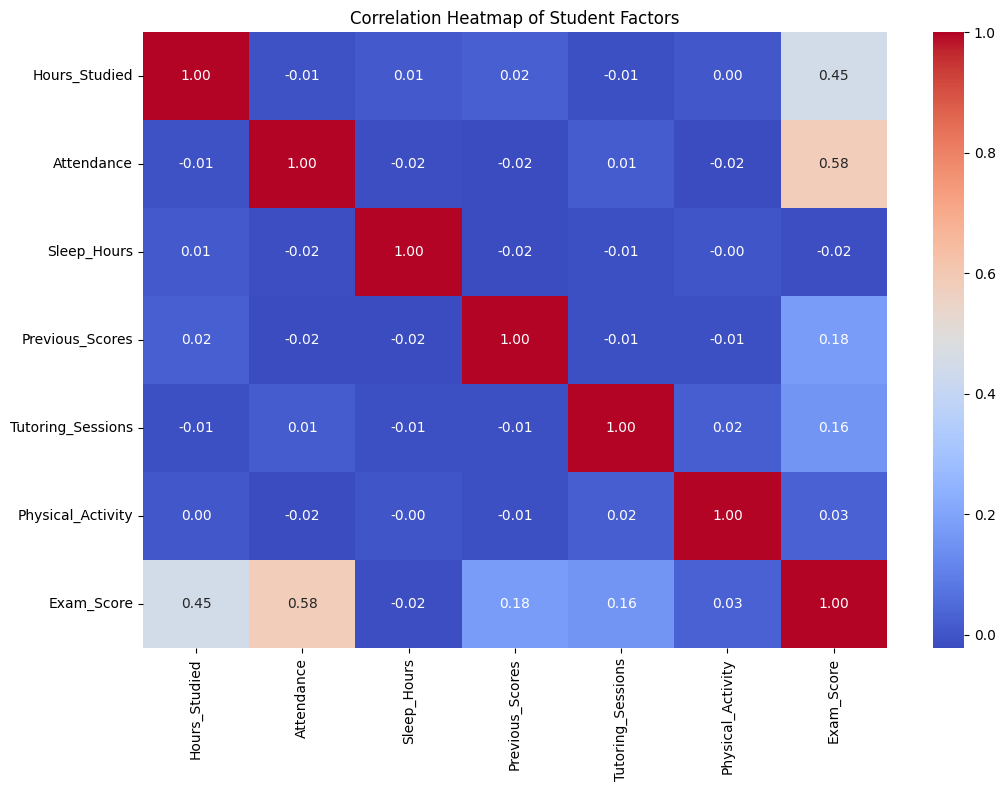

In [13]:
#Visualization
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', alpha=0.5)
plt.title('Relationship: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()
# 1. رسم العلاقة الأساسية (Scatter Plot) بشكل أنيق باستخدام Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Hours_Studied', y='Exam_Score', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Analysis of Study Hours vs Exam Scores')
plt.show()

# 2. رسم خريطة الارتباط (Heatmap) - دي بتبين لك قوة العلاقة بين كل الأعمدة الرقمية
plt.figure(figsize=(12, 8))
# بنختار فقط الأعمدة اللي نوعها أرقام عشان الـ Correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Student Factors')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Select only the columns that have 'object' data type (categorical data)
categorical_cols = df.select_dtypes(include=['object']).columns

# Loop through each categorical column and transform it to numerical values
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Print the first 5 rows to verify that all text is now numbers
print("Data after Label Encoding:")
print(df.head())

# Verify that all columns are now numeric (int or float)
print("\nUpdated Data Types:")
print(df.dtypes)

Data after Label Encoding:
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    0   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 1   
1                           0            8               59                 1   
2                           1            7               91                 2   
3                           1            8               98                 2   
4                           1            6               65                 2   

   Internet_Access  Tutoring_Sessio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error (MSE): 4.40
R-squared (R2 Score): 0.69

Actual vs Predicted Scores:
      Actual  Predicted
743       65  65.216613
5551      65  67.448411
3442      71  69.829703
6571      64  67.287805
4204      66  66.758159


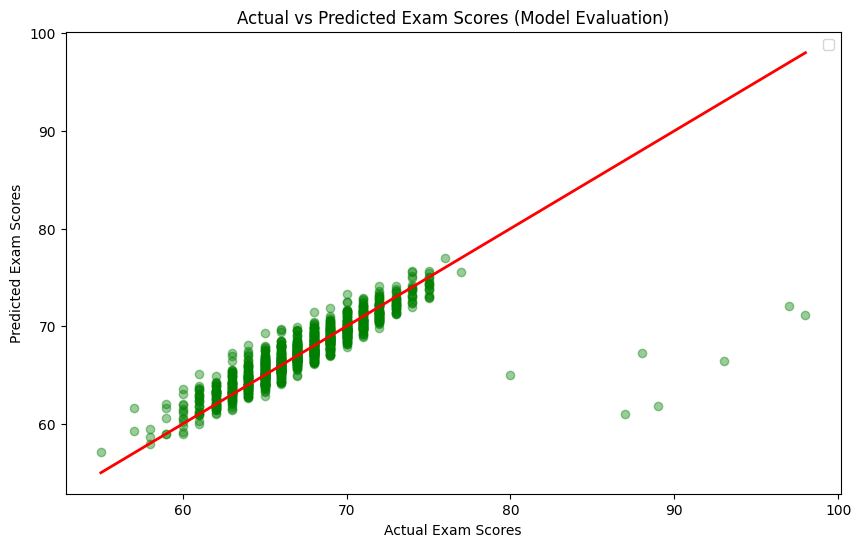

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Step 1: Define Features (X) and Target (y) ---
# We want to predict 'Exam_Score', so it is our Target (y)
# All other columns are our Features (X)
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# --- Step 2: Split the Data ---
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 3: Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 4: Make Predictions ---
y_pred = model.predict(X_test)

# --- Step 5: Evaluate the Model ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# Compare actual vs predicted values for the first 5 rows
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Scores:")
print(comparison.head())

# --- Step 7: Visualization of Predictions ---
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2) # Diagonal line
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Model Evaluation)')
plt.legend()
plt.show()